<a href="https://colab.research.google.com/github/JorgeUgalde/Sistemas_Expertos_Ejercicios/blob/main/Ejercicio_Robin_Hood.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
robin_hood = open('/content/drive/MyDrive/Colab Notebooks/Robin Hood.txt', 'r').read()

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize

In [6]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [7]:
ejemplo = 'El Sr. Ramírez ha visto un enjambre de abejas acercarse. Asustado, corrió como nunca había corrido en su vida. Olvidó que corría directo al precipicio.'
tokenized_sentences = sent_tokenize(ejemplo)
tokenized_sentences

['El Sr. Ramírez ha visto un enjambre de abejas acercarse.',
 'Asustado, corrió como nunca había corrido en su vida.',
 'Olvidó que corría directo al precipicio.']

In [8]:
tokenized_words = word_tokenize(ejemplo)
tokenized_words[:10]

['El',
 'Sr.',
 'Ramírez',
 'ha',
 'visto',
 'un',
 'enjambre',
 'de',
 'abejas',
 'acercarse']

In [9]:
robin_hood_tk_sent = sent_tokenize(robin_hood)
robin_hood_tk_sent[:5] #se muestran las primeras cinco oraciones

['Se me callan.',
 'Si, sé que ha pasado mucho tiempo pero díganme una cosa, si Rihanna se ha tomado 5 años de algo que le DA REAL, ¿Yo no puedo descansar dos meses de esto?',
 'Para reflexionar.',
 'En fin, como los Backstreet Boys: omg I’m back again, y con la historia de Robin Hood.',
 'A ver, si hacen memoria, van a recordar que el “Robin Hood” de Disney es un zorro, y todos los personajes son animalitos del bosque.']

In [10]:
robin_hood_tk_words = word_tokenize(robin_hood)
robin_hood_tk_words[:20] # se muestran los primeros veinte items

['Se',
 'me',
 'callan',
 '.',
 'Si',
 ',',
 'sé',
 'que',
 'ha',
 'pasado',
 'mucho',
 'tiempo',
 'pero',
 'díganme',
 'una',
 'cosa',
 ',',
 'si',
 'Rihanna',
 'se']

In [11]:
robin_hood_tk_words = [word for word in robin_hood_tk_words if word.isalnum()]
robin_hood_tk_words[:20]

['Se',
 'me',
 'callan',
 'Si',
 'sé',
 'que',
 'ha',
 'pasado',
 'mucho',
 'tiempo',
 'pero',
 'díganme',
 'una',
 'cosa',
 'si',
 'Rihanna',
 'se',
 'ha',
 'tomado',
 '5']

In [12]:
!pip install -U spacy

In [13]:
%%bash
python -m spacy download es_core_news_lg

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 568.0/568.0 MB 1.8 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('es_core_news_lg')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [14]:
import spacy

nlp = spacy.load('es_core_news_lg')

doc = nlp(robin_hood)
type(doc)

spacy.tokens.doc.Doc

In [15]:
spacy.tokens.doc.Doc

spacy.tokens.doc.Doc

In [16]:
robin_hood_entities = [(tok.text, tok.label_) for tok in doc.ents if tok.label_ != 'MISC']
robin_hood_entities

[('Rihanna', 'PER'),
 ('DA REAL', 'ORG'),
 ('¿Yo', 'ORG'),
 ('Backstreet Boys', 'ORG'),
 ('Robin Hood', 'PER'),
 ('Disney', 'PER'),
 ('José Luis', 'PER'),
 ('HÁBITAT', 'LOC'),
 ('belen', 'LOC'),
 ('José Luis', 'PER'),
 ('Disney', 'PER'),
 ('Roman de Renart', 'PER'),
 ('Disney', 'PER'),
 ('Robin Hood', 'PER'),
 ('Inglaterra', 'LOC'),
 ('Pedro Pérez', 'PER'),
 ('Robin Hood', 'PER'),
 ('Robin Hood', 'PER'),
 ('PERO', 'ORG'),
 ('Howard Pyle', 'PER'),
 ('CAPERUZA', 'ORG'),
 ('España', 'LOC'),
 ('Nottingham', 'LOC'),
 ('Inglaterra', 'LOC'),
 ('chevere', 'LOC'),
 ('Robin Hood', 'PER'),
 ('Robin', 'PER'),
 ('Robin', 'PER'),
 ('Robin', 'PER'),
 ('Robin', 'PER'),
 ('FORRESTLIFE', 'ORG'),
 ('Robin Hood', 'PER'),
 ('Robin', 'PER'),
 ('rey Richard', 'PER'),
 ('Nottingham', 'LOC'),
 ('Robin Hood', 'PER'),
 ('Robin Hood', 'PER'),
 ('FORRESTLIFE', 'ORG'),
 ('Robin', 'PER'),
 ('Robin Hood', 'PER'),
 ('Robin Hood', 'PER')]

In [17]:
for tok in doc.ents:
    if tok.label_ == 'PER':
        print(tok.text, tok.label_)

Rihanna PER
Robin Hood PER
Disney PER
José Luis PER
José Luis PER
Disney PER
Roman de Renart PER
Disney PER
Robin Hood PER
Pedro Pérez PER
Robin Hood PER
Robin Hood PER
Howard Pyle PER
Robin Hood PER
Robin PER
Robin PER
Robin PER
Robin PER
Robin Hood PER
Robin PER
rey Richard PER
Robin Hood PER
Robin Hood PER
Robin PER
Robin Hood PER
Robin Hood PER


In [18]:
for sent in robin_hood_tk_sent:
    if 'Ajá' in sent:
        print(sent)

Ajá érase una vez en un lugar llamado Nottingham en Inglaterra, vivía un forajido/pran y su banda de forajidos con los que hacía vainas ilegales y de moral dudosa pero vainas ilegales y de moral dudosa que favorecían los intereses de la gente del bosque entonces, chevere pues.


In [19]:
robin_hood_pers = [tok for tok in doc.ents if tok.label_ == 'PER' and 'Ajá' not in tok.text]
for tok in robin_hood_pers:
    print(tok.text, tok.label_)

Rihanna PER
Robin Hood PER
Disney PER
José Luis PER
José Luis PER
Disney PER
Roman de Renart PER
Disney PER
Robin Hood PER
Pedro Pérez PER
Robin Hood PER
Robin Hood PER
Howard Pyle PER
Robin Hood PER
Robin PER
Robin PER
Robin PER
Robin PER
Robin Hood PER
Robin PER
rey Richard PER
Robin Hood PER
Robin Hood PER
Robin PER
Robin Hood PER
Robin Hood PER


In [20]:
from collections import Counter

robin_hood_names = [tok.text for tok in doc.ents if tok.label_ == 'PER' and 'Ajá' not in tok.text]
pers_counter = Counter(robin_hood_names)
pers_counter = list(reversed(pers_counter.most_common()))
pers_counter

[('rey Richard', 1),
 ('Howard Pyle', 1),
 ('Pedro Pérez', 1),
 ('Roman de Renart', 1),
 ('Rihanna', 1),
 ('José Luis', 2),
 ('Disney', 3),
 ('Robin', 6),
 ('Robin Hood', 10)]

In [21]:
names = [name for name, count in pers_counter]
count = [count for name, count in pers_counter]

In [22]:
import matplotlib.pyplot as plt

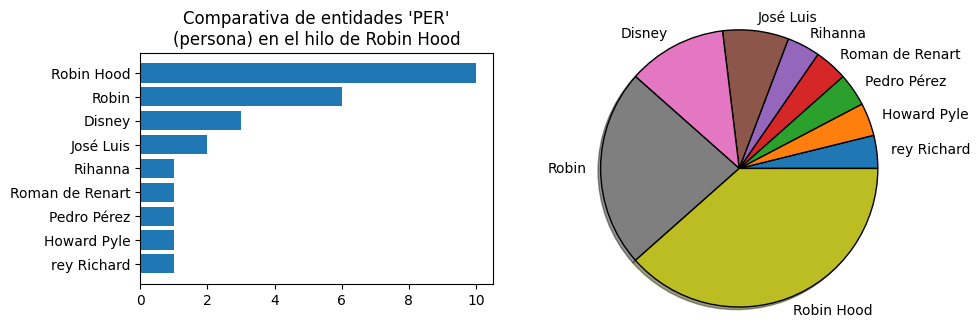

In [23]:
plt.figure(figsize=(10, 3))
plt.subplot(121)
barh = plt.barh(names, count)
plt.title('Comparativa de entidades \'PER\'\n(persona) en el hilo de Robin Hood')
plt.subplot(122)
pie = plt.pie(count, labels=names, wedgeprops={'edgecolor': 'black'},
              radius=1.5, shadow=True)
plt.style.use('fivethirtyeight')
plt.show()